In [11]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import cartopy.crs as ccrs
import glob

In [29]:
def annual(data):
    ts = np.zeros((int(len(data)/12)))
    for i in np.arange(0,len(data),12):
        ts[int(i/12)] = np.mean(data[i:i+12])
    return ts

In [51]:
def global_mean(ds):
    lat = ds['lat']
    weight = np.cos(np.deg2rad(lat))
    weight /= weight.mean()
    other_dims = set(ds.dims) - {'time'}
    return (ds * weight).mean(other_dims)

In [101]:
def plot_global_mean(data):
    plt.figure(figsize=(8, 4),dpi=150)
    plt.plot((global_mean(data[3])).rolling(time=12).mean().values,lw=2,label='ssp585',c='r')
    plt.plot((global_mean(data[2])).rolling(time=12).mean().values,lw=2,label='G1')
    plt.plot((global_mean(data[1])).rolling(time=12).mean().values,lw=2,label='G6solar')
    plt.plot((global_mean(data[0])).rolling(time=12).mean().values,lw=2,label='G6sulfur')

    #plt.ylim([14,22])
    #plt.ylabel('deg C')
    plt.xlabel('months')
    plt.legend()
    #plt.title('Surface temperature (12 month rolling mean)')
    plt.show()

In [176]:
def read_in_Amon(variable):
    sulfur = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6sulfur/r1i1p1f2/Amon/'+variable+'/gn/latest/*')
    solar = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6solar/r1i1p1f2/Amon/'+variable+'/gn/latest/*')
    g1 = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G1/r1i1p1f2/Amon/'+variable+'/gn/latest/*')
    ssp585 = xr.open_mfdataset( '/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/Amon/'+variable+'/gn/latest/*')
    return sulfur.rename({variable: 'v'}), solar.rename({variable: 'v'}), g1.rename({variable: 'v'}), ssp585.rename({variable: 'v'})

def read_in_Emon(variable):
    sulfur = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6sulfur/r1i1p1f2/Emon/'+variable+'/gn/latest/*')
    solar = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6solar/r1i1p1f2/Emon/'+variable+'/gn/latest/*')
    g1 = xr.open_mfdataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G1/r1i1p1f2/Emon/'+variable+'/gn/latest/*')
    ssp585 = xr.open_mfdataset( '/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/Emon/'+variable+'/gn/latest/*')
    return sulfur.rename({variable: 'v'}), solar.rename({variable: 'v'}), g1.rename({variable: 'v'}), ssp585.rename({variable: 'v'})

In [190]:
def linear_trend(y):
    linfit = np.polyfit(range(len(y)), y ,1)
    return xr.DataArray(linfit[0])

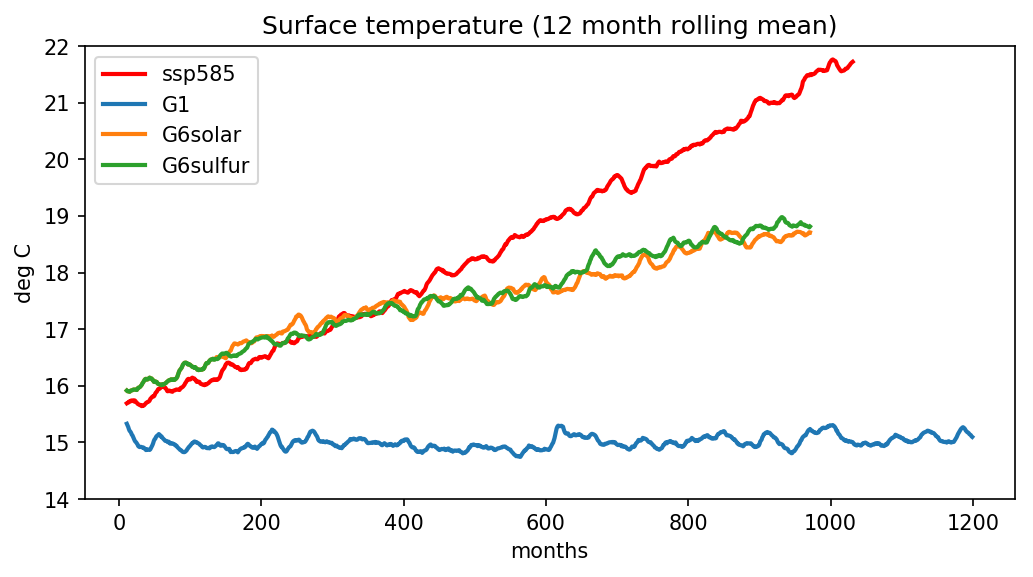

In [61]:
# surface temperature
sulfur_ts = '/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6sulfur/r1i1p1f2/Amon/ts/gn/files/d20191113/*'
solar_ts = '/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6solar/r1i1p1f2/Amon/ts/gn/files/d20191031/*'
g1_ts = '/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G1/r1i1p1f2/Amon/ts/gn/files/d20190916/*'
ssp585_ts = '/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/Amon/ts/gn/files/d20190507/*'

g6sulfur_ts = xr.open_mfdataset(sulfur_ts)
g6solar_ts = xr.open_mfdataset(solar_ts)
g1_ts = xr.open_mfdataset(g1_ts)
ssp585_ts = xr.open_mfdataset(ssp585_ts)

plot_global_mean(ssp585_ts, g1_ts, g6solar_ts, g6sulfur_ts)

In [177]:
downSW = read_in_Amon('rsdt')
upSW = read_in_Amon('rsut')
upLW = read_in_Amon('rlut')

aod = read_in_Emon('od550aerso')

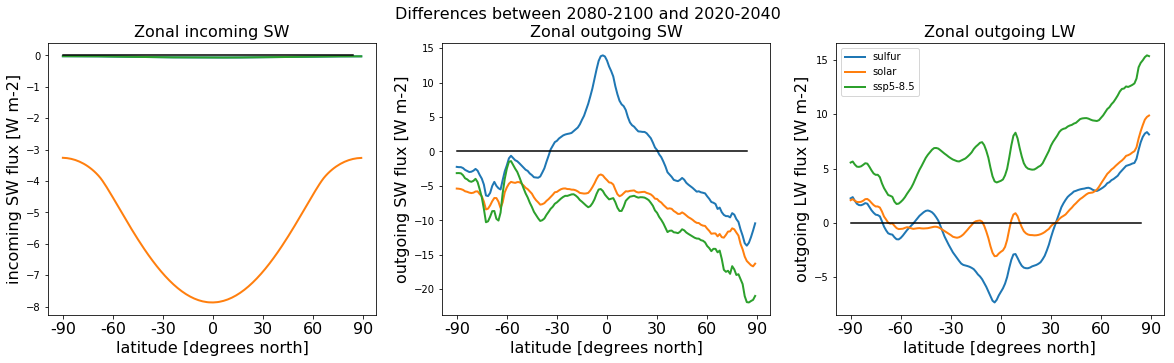

In [250]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
data = [downSW, upSW, upLW, aod]
title = ['Zonal incoming SW', 'Zonal outgoing SW', 'Zonal outgoing LW', 'Zonal Stratospheric AOD at 550nm']

for i in range(3):
    ax[i].plot(data[i][0].sel(time = slice('2080-01-01','2099-12-30')).mean(('lon','time')).v.values - data[i][0].sel(time = slice('2020-01-01','2039-12-30')).mean(('lon','time')).v.values, label = 'sulfur', lw=2)
    ax[i].plot(data[i][1].sel(time = slice('2080-01-01','2099-12-30')).mean(('lon','time')).v.values - data[i][1].sel(time = slice('2020-01-01','2039-12-30')).mean(('lon','time')).v.values, label = 'solar',lw=2)
    #ax[i].plot(downSW[2].sel(time = slice('2080-01-01','2099-12-30')).mean(('lon','time')).rsdt.values - downSW[2].sel(time = slice('2020-01-01','2039-12-30')).mean(('lon','time')).rsdt.values)
    ax[i].plot(data[i][3].sel(time = slice('2080-01-01','2099-12-30')).mean(('lon','time')).v.values - data[i][3].sel(time = slice('2020-01-01','2039-12-30')).mean(('lon','time')).v.values, label = 'ssp5-8.5',lw=2)
    
    ax[i].plot(np.arange(0,140,1), np.zeros(140), '-', color='black')
    ax[i].set_xticks(np.arange(0,len(data[i][0].lat)+1, 24))
    ax[i].set_xticklabels(np.arange(-90,110,30), fontsize = 16)
    ax[i].set_title(title[i], fontsize = 16)
    ax[i].set_xlabel('latitude [degrees north]', fontsize = 16)

ax[2].legend(loc='upper left')
ax[0].set_ylabel('incoming SW flux [W m-2]', fontsize = 16)
ax[1].set_ylabel('outgoing SW flux [W m-2]', fontsize = 16)
ax[2].set_ylabel('outgoing LW flux [W m-2]', fontsize = 16)

fig.suptitle('Differences between 2080-2100 and 2020-2040', fontsize = 16)

plt.savefig('/home/users/croesch/CMIP6hackathon/TOA_net_rad_AOD.png')

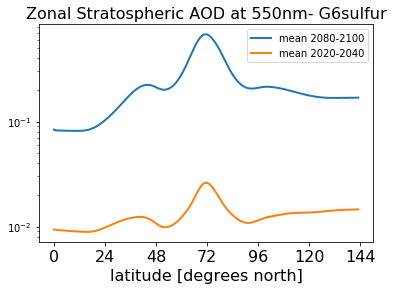

In [265]:
i = 0
plt.plot(data[3][i].sel(time = slice('2080-01-01','2099-12-30')).mean(('lon','time')).v.values, label = 'mean 2080-2100', lw = 2)
plt.plot(data[3][i].sel(time = slice('2020-01-01','2039-12-30')).mean(('lon','time')).v.values, label = 'mean 2020-2040', lw= 2)
plt.legend()
plt.xticks(np.arange(0,len(data[3][i].lat)+1, 24), label = np.arange(-90,110,30), fontsize = 16)
plt.title('Zonal Stratospheric AOD at 550nm- G6sulfur', fontsize = 16)
plt.xlabel('latitude [degrees north]', fontsize = 16)
plt.yscale('log')
#plt.ylabel(r'aerosol optical thickness', fontsize = 16)

#plt.savefig('/home/users/croesch/CMIP6hackathon/AOD.png')